In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error



In [2]:
df= pd.read_csv('./datasets/train.csv')
df.shape

(2051, 81)

In [3]:
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_val_per = (missing_val / len(df)) * 100
                                
missing_df = pd.DataFrame({'Missing Values': missing_val, 'Percentage': missing_val_per})# Creating a DF to display the missing values and their corresponding percentages
missing_df

,Missing Values,Percentage
Pool QC,2042,99.561190
Misc Feature,1986,96.830814
Alley,1911,93.174061
Fence,1651,80.497318
Fireplace Qu,1000,48.756704
Lot Frontage,330,16.089712
Garage Yr Blt,114,5.558264
Garage Cond,114,5.558264
Garage Qual,114,5.558264
Garage Finish,114,5.558264


In [4]:
df.drop([ "Pool QC", "Misc Feature","Alley", 'Fence' ], axis=1, inplace=True)

In [5]:
df['Garage Cond'].fillna('NA', inplace=True)

In [6]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)

In [7]:
df['Garage Qual'].fillna('NA', inplace=True)

In [8]:
df['Garage Finish'].fillna('NA', inplace=True)

In [9]:
df['Garage Yr Blt'].fillna('NA', inplace=True)

In [10]:
df['Garage Type'].fillna('NA', inplace=True)

In [11]:
df['Fireplace Qu'].fillna('NA', inplace=True)

In [12]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)
df.shape

(2051, 77)

In [13]:
df.dropna(inplace= True) 
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_val_per = (missing_val / len(df)) * 100
                                
missing_df = pd.DataFrame({'Missing Values': missing_val, 'Percentage': missing_val_per})# Creating a DF to display the missing values and their corresponding percentages
missing_df

,Missing Values,Percentage


Successfully removed all Null valuse from the *entire* dataset.  

In [14]:
print(f"df length = {df.shape[0]}")
print(f"Num of unique values in ID column = {df.Id.unique().shape}")

df length = 1969
Num of unique values in ID column = (1969,)


In [15]:
df.set_index("Id", inplace=True)

In [16]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1.969000e+03,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,...,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,7.125659e+08,57.079736,68.873737,10005.619604,6.154901,5.583545,1971.814627,1984.434738,101.750127,454.235145,...,95.962925,47.868969,22.295582,2.699340,16.864906,2.212798,51.385983,6.212291,2007.776028,182892.861859
std,1.886729e+08,43.009018,21.241827,6710.225845,1.385860,1.105352,30.227788,20.860671,176.432970,461.013988,...,129.593082,66.291746,59.698778,25.744208,57.797094,36.444159,579.720224,2.747621,1.313282,78938.334289
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284562e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,5.354521e+08,50.000000,69.055200,9405.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,384.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,9.071751e+08,70.000000,78.000000,11492.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,741.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214900.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [17]:
non_numerical_columns = df.select_dtypes(include=['object']).columns
non_numerical_columns 

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

In [18]:
len(non_numerical_columns)

39

In [19]:
unique_list = list(set(df.dtypes.to_list()))
unique_list

[dtype('O'), dtype('float64'), dtype('int64')]

In [20]:
print(f"Shape of df before removing non-numeric columns: {df.shape}")
df_no_non_numeric = df.drop(non_numerical_columns.values, axis=1)
print(f"Shape of df after removing non-numeric columns: {df_no_non_numeric.shape}")

Shape of df before removing non-numeric columns: (1969, 76)
Shape of df after removing non-numeric columns: (1969, 37)


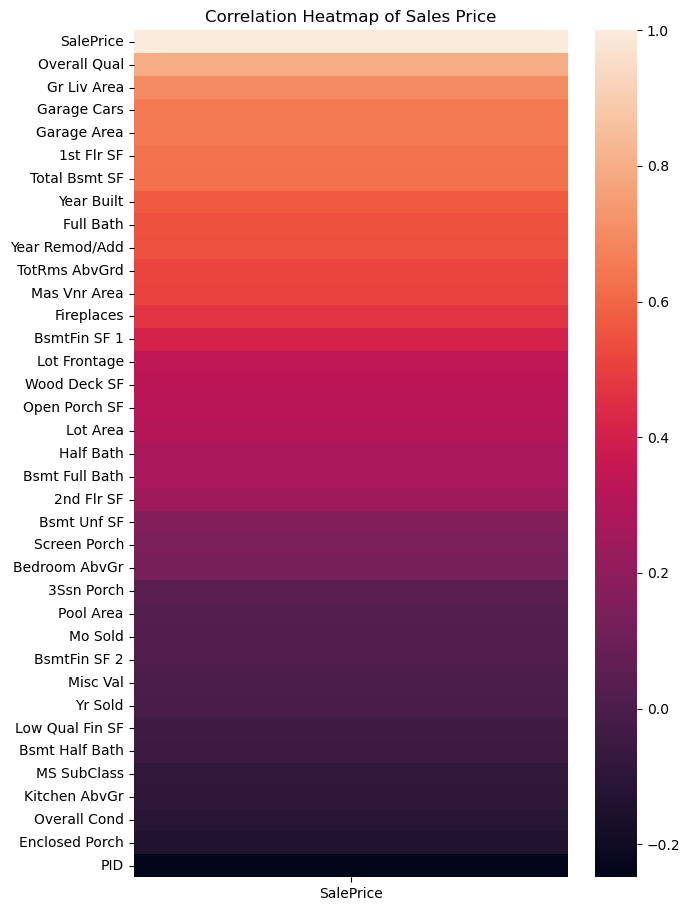

In [21]:
plt.figure(figsize=(7, 11))
sns.heatmap(df_no_non_numeric.corr()[['SalePrice']].sort_values('SalePrice', ascending=False))  
plt.title('Correlation Heatmap of Sales Price')
plt.show()

![Alt text](image.png)

In [22]:
corr = df_no_non_numeric.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)
corr

,SalePrice
SalePrice,1.000000
Overall Qual,0.797646
Gr Liv Area,0.700919
Garage Cars,0.651497
Garage Area,0.651016
1st Flr SF,0.630052
Total Bsmt SF,0.629267
Year Built,0.567785
Full Bath,0.548034
Year Remod/Add,0.541540


We set out feature selection thresholds to features that have correlation above 0.6

In [23]:
feature_seleted = corr[1:7].index.tolist()
feature_seleted

['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 '1st Flr SF',
 'Total Bsmt SF']

In [24]:
# Base line model

X = df_no_non_numeric[feature_seleted]
y = df_no_non_numeric['SalePrice']

print(f"X shape {X.shape}")
print(f"y shape {y.shape}")
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# metrics
rmse = mean_squared_error(y_test, y_pred, squared= False)
r2 = r2_score(y_test, y_pred)

rmse, r2


X shape (1969, 6)
y shape (1969,)


(40581.66553524896, 0.7316178447850976)

## Features Selection

In [61]:
df_no_non_numeric['SalePrice']

Id
109     130500
544     220000
153     109000
318     174000
255     138500
         ...  
1587    298751
785      82500
916     177000
639     144000
10      189000
Name: SalePrice, Length: 1969, dtype: int64

In [34]:
categorical_dummied = pd.get_dummies(df[non_numerical_columns], drop_first= True, dtype="int64")
categorical_dummied

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
544,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
153,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
318,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
255,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
785,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
916,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [46]:
final_df = pd.concat([df_no_non_numeric, categorical_dummied], axis=1)
final_df.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,533.0,...,0,1,0,0,0,0,0,0,0,1
544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,637.0,...,0,1,0,0,0,0,0,0,0,1
153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,731.0,...,0,1,0,0,0,0,0,0,0,1
318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
unique_list = list(set(final_df.dtypes.to_list()))
unique_list

[dtype('float64'), dtype('int64')]

In [74]:
from dmba import stepwise_selection
from dmba import AIC_score, adjusted_r2_score, regressionSummary

#X = df_no_non_numeric.drop('SalePrice', axis=1)
X = final_df.drop('SalePrice', axis=1)

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

r2 = r2_score(y, best_model.predict(X[best_variables]))
print(f"r2 = {r2}")

Variables: PID, MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Fireplaces, Garage Cars, Garage Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Misc Val, Mo Sold, Yr Sold, MS Zoning_FV, MS Zoning_RH, MS Zoning_RL, MS Zoning_RM, Street_Pave, Lot Shape_IR2, Lot Shape_IR3, Lot Shape_Reg, Land Contour_HLS, Land Contour_Low, Land Contour_Lvl, Utilities_NoSeWa, Lot Config_CulDSac, Lot Config_FR2, Lot Config_FR3, Lot Config_Inside, Land Slope_Mod, Land Slope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_Greens, Neighborhood_GrnHill, Neighborhood_

In [78]:
regressionSummary(y, best_model.predict(X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 21259.9586
            Mean Absolute Error (MAE) : 13872.2887
          Mean Percentage Error (MPE) : -0.8861
Mean Absolute Percentage Error (MAPE) : 8.3089


In [73]:
print(f"X.columns = {X.columns}")
print(f"best_variables = {best_variables}")
print(f"len(X.columns.value) = {len(X.columns.values)}")
print(f"len(best_variables) = {len(best_variables)}")

X.columns = Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold'],
      dtype='object')
best_variables = ['Overall Qual', 'Gr Liv Area', 'BsmtFin SF 1', 'Garage Cars', 'MS SubClass', 'Year Built', 'Misc Val', 'Mas Vnr Area', 'Year Remod/Add', 'Screen Porch', 'Lot Area', 'Bsmt Full Bath', 'Total Bsmt SF', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Wood Deck SF', 'TotRms AbvGrd', 'Kitchen AbvGr', 'Fireplaces', 'Garage Area', 'Enclosed Porch', 